# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json~/.kaggle/

cp: missing destination file operand after 'kaggle.json~/.kaggle/'
Try 'cp --help' for more information.


In [3]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 43.5MB/s]


In [4]:
!unzip /content/ibm-hr-analytics-attrition-dataset.zip

Archive:  /content/ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


# Reading the Dataset

In [34]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


#Checking for missing values

In [35]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


#Checking the min, median, max of numerical features

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Dropping unncessary columns

In [36]:
df.drop(columns =['Over18','EmployeeNumber','EmployeeCount'], axis =1, inplace = True)

#Encoding the Categorical columns to numbers

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
cat_cols = df.select_dtypes(include='object')
cat_cols

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


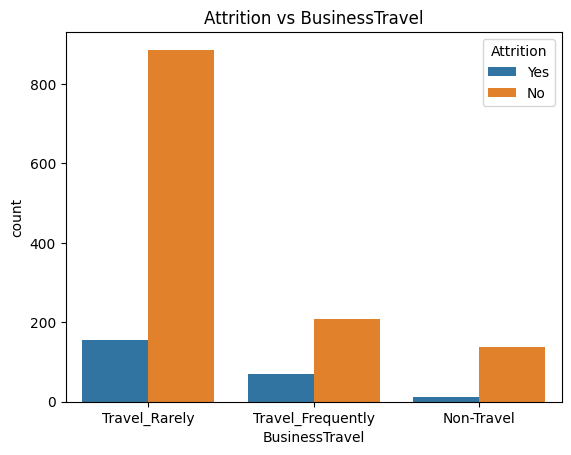

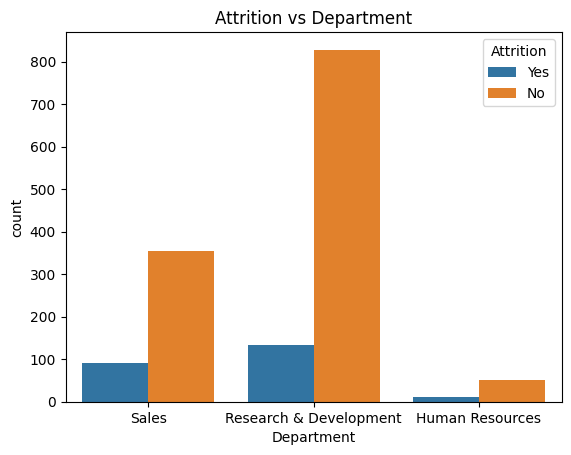

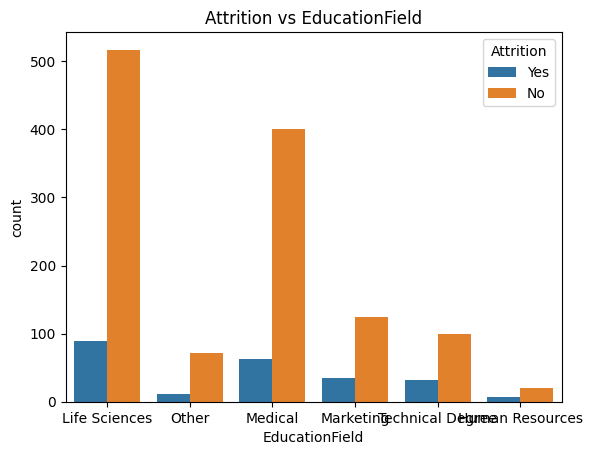

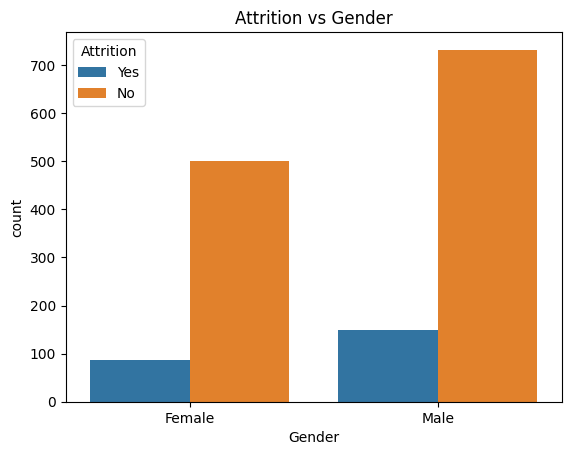

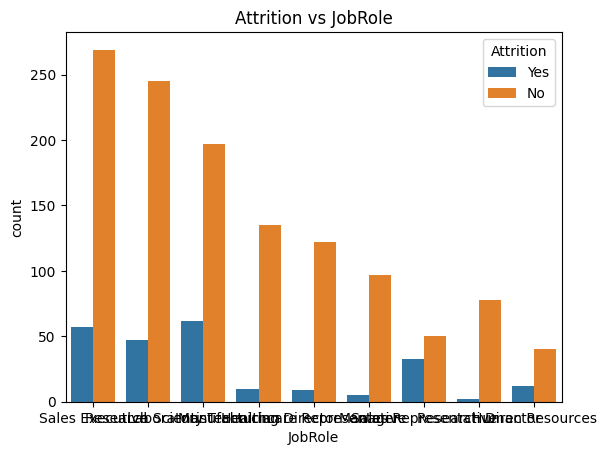

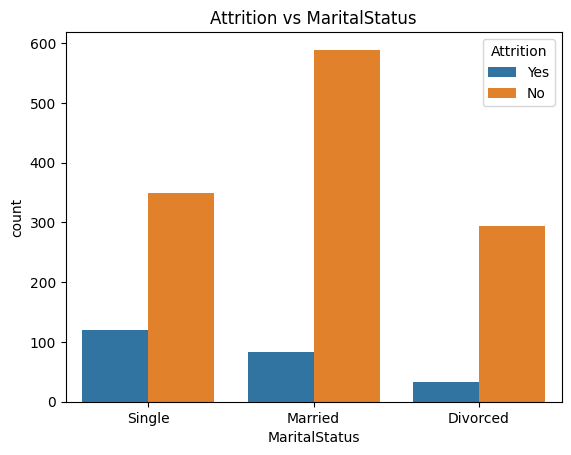

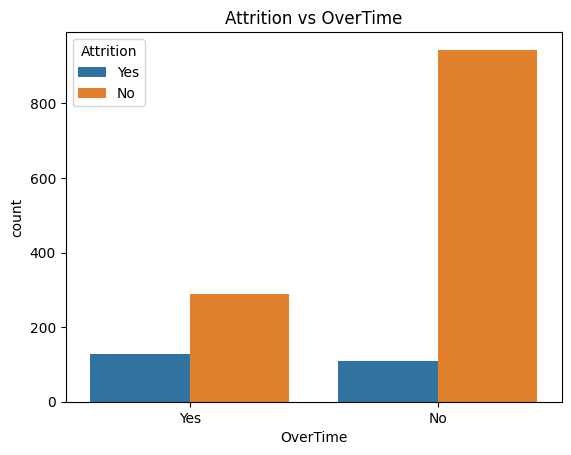

<Figure size 640x480 with 0 Axes>

In [42]:
for i in cat_cols.iloc[:,1:]:
  sns.countplot(data=df, x =i,hue='Attrition')
  plt.title(f'Attrition vs {i}')
  plt.show()
  plt.savefig(f'Attrition vs {i}.png')

In [43]:
for i in df.select_dtypes(include='object'):
  df[i] = le.fit_transform(df[i])

In [20]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,2,80,0,7,3,3,0,0,0,0


In [44]:
df['Age_slab'] = np.where(df['Age']>49.9,'50-60', np.where(df['Age']>39.9,'40-50', np.where(df['Age']>29.9,'30-40', np.where(df['Age']>24.9,'25-30', np.where(df['Age']>17.9,'18-25','<18')))))
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_slab
0,41,1,2,1102,2,1,2,1,2,0,...,80,0,8,0,1,6,4,0,5,40-50
1,49,0,1,279,1,8,1,1,3,1,...,80,1,10,3,3,10,7,1,7,40-50
2,37,1,2,1373,1,2,2,4,4,1,...,80,0,7,3,3,0,0,0,0,30-40
3,33,0,1,1392,1,3,4,1,4,0,...,80,0,8,3,3,8,7,3,0,30-40


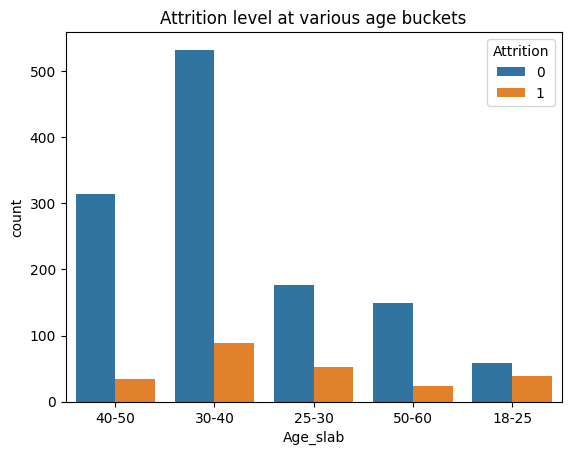

<Figure size 640x480 with 0 Axes>

In [32]:
sns.countplot(data= df, x = 'Age_slab', hue='Attrition')
plt.title('Attrition level at various age buckets')
plt.show()
plt.savefig('Attrition vs Age Bucket.png')

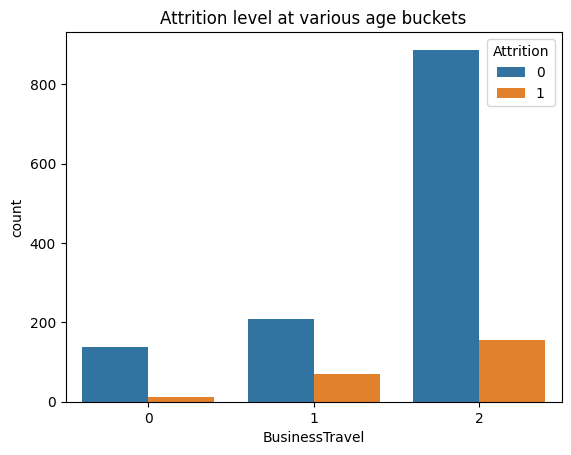

<Figure size 640x480 with 0 Axes>

In [33]:
sns.countplot(data= df, x = 'BusinessTravel', hue='Attrition')
plt.title('Attrition level at various age buckets')
plt.show()
plt.savefig('Attrition vs Age Bucket.png')

#Checking Class imbalance

In [47]:
df['Attrition'].value_counts(normalize=True)


,proportion
Attrition,
0,0.838776
1,0.161224


In [48]:
df_att = df[df['Attrition']==1]
df_not_att = df[df['Attrition']==0]

In [49]:
df_att = df_att.sample(df_not_att.shape[0], replace=True)
df_att.shape

(1233, 33)

In [50]:
print(df_att.shape)
print(df_not_att.shape)

(1233, 33)
(1233, 33)


In [51]:
data = pd.concat([df_att,df_not_att])
data.shape

(2466, 33)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
x = data.drop(columns='Attrition', axis=1)
y = data['Attrition']

In [61]:
x['Age_slab']= le.fit_transform(x['Age_slab'])

In [62]:
x.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_slab
744,37,2,1141,1,11,2,3,1,0,61,...,80,0,15,2,1,1,0,0,0,2
1223,47,1,1093,2,9,3,1,3,1,82,...,80,0,25,3,1,23,5,14,10,3
1201,23,2,1320,1,8,1,3,4,1,93,...,80,0,5,2,3,5,4,1,2,0


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify =y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1972, 32)
(494, 32)
(1972,)
(494,)


In [64]:
ss = StandardScaler()
x_train = pd.DataFrame(ss.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(ss.transform(x_test), columns = x.columns)

In [66]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [89]:
l1 = ['Random Forest Classifier','Ada Boost Classifier','Gradient Boosting Classifier','Bernoulli NB','KNeighbors Classifier','Logistic Regression','Stacking Classifier']
l2 = []
l3 = []

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
l2.append(np.round(accuracy_score(y_test, y_pred_rf)*100))
y_pred_train_rf = rf.predict(x_train)
l3.append(np.round(accuracy_score(y_train, y_pred_train_rf)*100))

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)
l2.append(np.round(accuracy_score(y_test, y_pred_ada)*100))
y_pred_train_ada = ada.predict(x_train)
l3.append(np.round(accuracy_score(y_train, y_pred_train_ada)*100))

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
l2.append(np.round(accuracy_score(y_test, y_pred_gb)*100))
y_pred_train_gb = gb.predict(x_train)
l3.append(np.round(accuracy_score(y_train, y_pred_train_gb)*100))

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
l2.append(np.round(accuracy_score(y_test, y_pred_bnb)*100))
y_pred_train_bnb = bnb.predict(x_train)
l3.append(np.round(accuracy_score(y_train, y_pred_train_bnb)*100))

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
l2.append(np.round(accuracy_score(y_test, y_pred_knn)*100))
y_pred_train_knn = knn.predict(x_train)
l3.append(np.round(accuracy_score(y_train, y_pred_train_knn)*100))

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
l2.append(np.round(accuracy_score(y_test, y_pred_lr)*100))
y_pred_train_lr = lr.predict(x_train)
l3.append(np.round(accuracy_score(y_train, y_pred_train_lr)*100))

In [91]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=[('rf',rf),('ada',ada),('gb',gb),('bnb',bnb),('knn',knn),('lr',lr)], final_estimator=LogisticRegression())
sc.fit(x_train, y_train)
y_pred_sc = sc.predict(x_test)
l2.append(np.round(accuracy_score(y_test, y_pred_sc)*100))
y_pred_train_sc = sc.predict(x_train)
l3.append(np.round(accuracy_score(y_train, y_pred_train_sc)*100))

In [109]:
result = pd.DataFrame({'Model':l1,'Test_Accuracy in %':l2,'Train_Accuracy in %':l3}).sort_values(by='Test_Accuracy in %', ascending=False)
result

,Model,Test_Accuracy in %,Train_Accuracy in %
6,Stacking Classifier,97.0,100.0
0,Random Forest Classifier,96.0,100.0
2,Gradient Boosting Classifier,88.0,95.0
4,KNeighbors Classifier,82.0,90.0
1,Ada Boost Classifier,81.0,81.0
5,Logistic Regression,78.0,75.0
3,Bernoulli NB,69.0,70.0


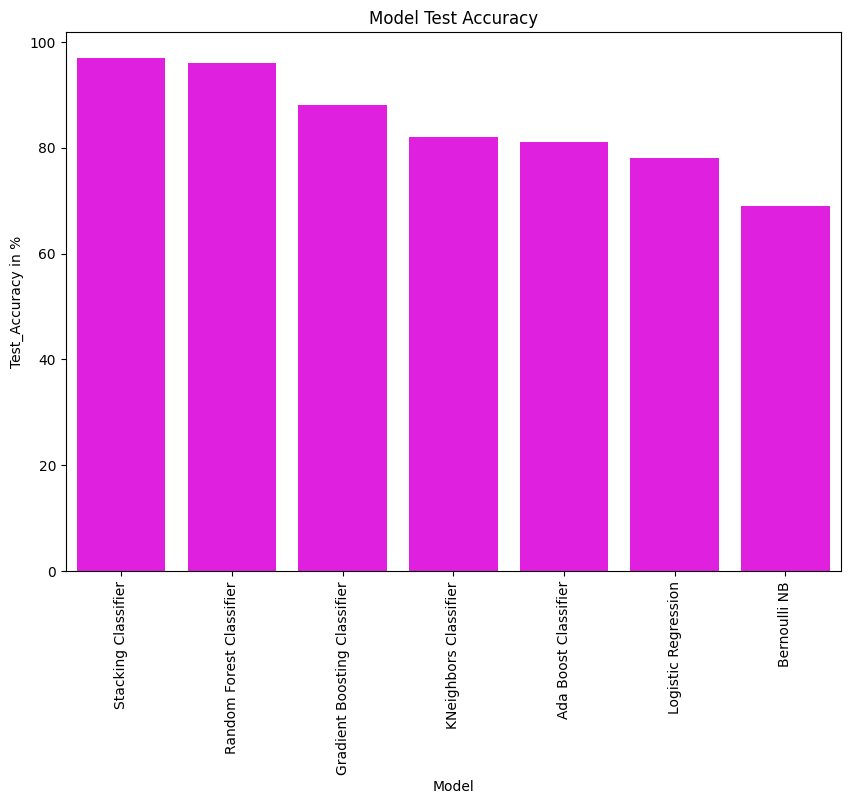

In [112]:
plt.figure(figsize=(10,7))
sns.barplot(data=result, x='Model', y='Test_Accuracy in %', color='magenta')
plt.xticks(rotation=90)
plt.title('Model Test Accuracy')
plt.savefig('Test_Accuracy.png')
plt.show()

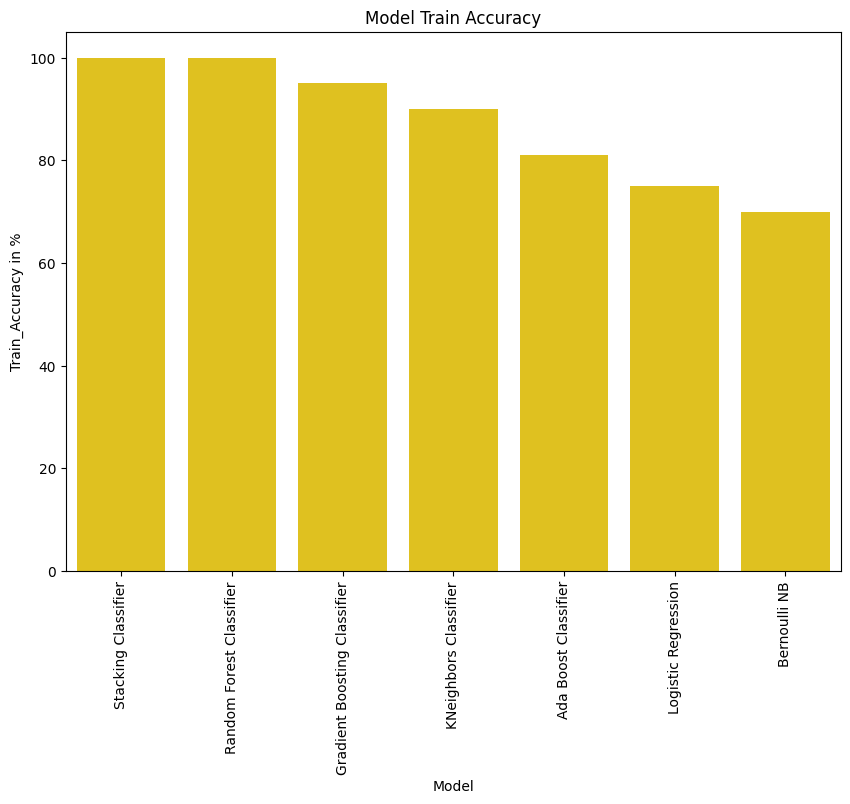

In [114]:
plt.figure(figsize=(10,7))
sns.barplot(data=result, x='Model', y='Train_Accuracy in %', color='gold')
plt.xticks(rotation=90)
plt.title('Model Train Accuracy')
plt.savefig('Train_Accuracy.png')
plt.show()